# Loading Data

In [10]:
data <- read.csv("D:/Research/keyword/Keyword/All/4 journals.csv")
nrow(data)
# str(data)
# head(data$abstract_ratio)
# sum(data[which(data$source.title=="computers and education"),"no_references"])

[1] 2887

# Transforming Variables

In [11]:
summary(data$cited.by_scaled)
na_index <- which(is.na(data$cited.by))
na_index
##data[na_index, "cited.by"] <- 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.6692 -0.5707 -0.3008  0.0000  0.1436 11.7000 

integer(0)

# Data Cleaning

In [12]:
nrow(data)
summary(data$cited.by_scaled)

data <- data[data$cited.by_scaled <4,]
nrow(data)
summary(data$cited.by_scaled)

[1] 2887

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.6692 -0.5707 -0.3008  0.0000  0.1436 11.7000 

[1] 2850

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.66920 -0.57070 -0.30080 -0.07369  0.11890  3.96100 

In [1]:
# cited.by.table <- table(data$cited.by)
# # cited.by.table
# # round(prop.table(cited.by.table),2) # row percentages 
# rbind(cited.by.table,round(prop.table(cited.by.table),2))

# ##------------------------------------
# cited.by.table <- table(log(data$cited.by_zero))
# # cited.by.table
# # round(prop.table(cited.by.table),2) # row percentages 
# rbind(cited.by.table,round(prop.table(cited.by.table),2))

# Creating New Target Variables

In [5]:
# data$cited.by_zero <- 0


# for (row in 1:nrow(data))
# #     row=1
#     {if (data[row,"cited.by"] == 0  & !(is.na(data[row,"cited.by"])))
#     data[row,"cited.by_zero"] <- data[row,"cited.by"] + 0.5
#     else data[row,"cited.by_zero"] <- data[row,"cited.by"] }
     
# #hist(log(data$cited.by_zero))
    
     
# hist   (log(data$cited.by_zero))
# #barplot(log(data$cited.by_zero))


# Part 1: Linear Regression for all data points-scaled

In [16]:
data$cited.by_scaled_trans <- 0

require(MASS,quietly=TRUE) 
pred_numeric <- c("abstract_length" ,"page.count","title_length", "abstract_ratio" ,"no_references","no_authors"
                  ,"numkeys", "cited.by_scaled", "article_age","weight_ratio")
pred_cat     <- c("source.title")
pred_data     <- data[,c(pred_numeric,pred_cat)]
##-----------------------------------------------------------
pred_numeric2 <- c("abstract_length" ,"page.count","title_length", "abstract_ratio" ,"no_references","no_authors"
                  ,"numkeys", "cited.by_scaled_trans", "article_age","weight_ratio")
pred_cat2     <- c("source.title")
pred_data2     <- data[,c(pred_numeric2,pred_cat2)]

# tail(pred_data2)
linear_reg   <- lm(cited.by_scaled ~ ., data=pred_data)
# summary(linear_reg)

data$cited.by_scaled_trans <- yjPower(data$cited.by_scaled, -1, jacobian.adjusted = FALSE)
pred_data2     <- data[,c(pred_numeric2,pred_cat2)]


linear_reg_trans <- lm(cited.by_scaled_trans ~ ., data=pred_data2)
summary(linear_reg_trans)


Call:
lm(formula = cited.by_scaled_trans ~ ., data = pred_data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74625 -0.35919 -0.05842  0.38326  1.46320 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                -1.0760898  0.0669652 -16.069
abstract_length                             0.0005006  0.0001830   2.736
page.count                                 -0.0178803  0.0027049  -6.610
title_length                                0.0024808  0.0023345   1.063
abstract_ratio                              0.8985543  0.4464315   2.013
no_references                               0.0047499  0.0005001   9.499
no_authors                                  0.0153446  0.0066246   2.316
numkeys                                    -0.0109815  0.0079301  -1.385
article_age                                 0.1117397  0.0035087  31.846
weight_ratio                                0.0495747  0.2761664   0.180
source.title

# Model Selection

In [26]:
# linear_reg_step <- step(linear_reg)
# linear_reg_step

In [15]:
# linear_reg_final <- lm(log(cited.by_zero) ~ page.count + abstract_ratio + 
#     no_references + article_age + source.title, data = pred_data)
# summary(linear_reg_final)

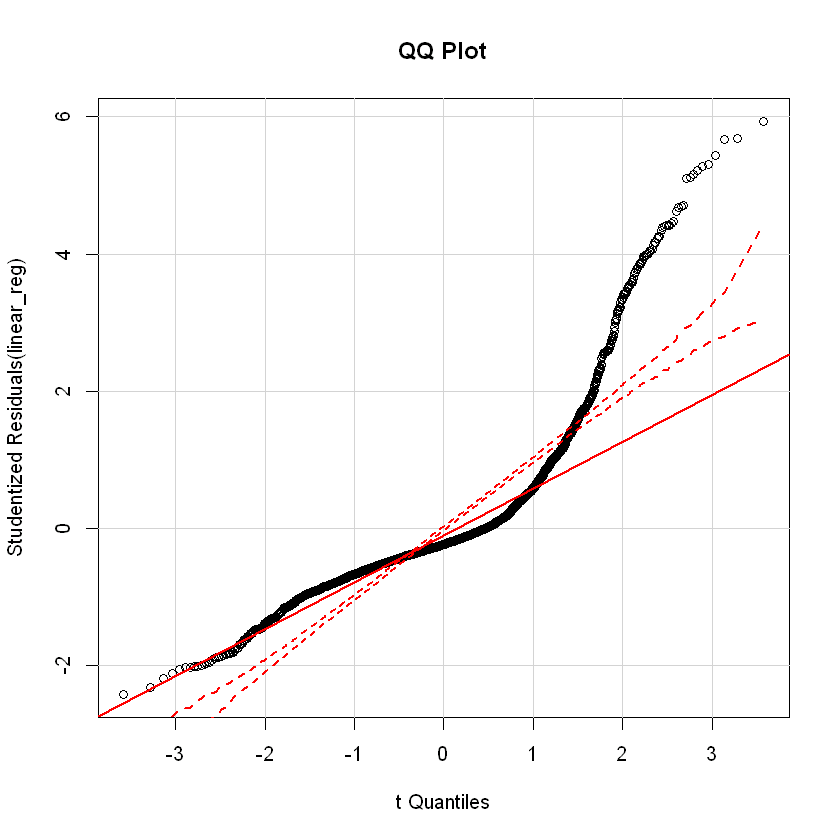

In [14]:
require(car,quietly=TRUE)
qqPlot <- qqPlot(linear_reg, main="QQ Plot") #qq plot for studentized resid 
# qqPlot(linear_reg0, main="QQ Plot") #qq plot for studentized resid 


# Outlier Detection

In [80]:
# outlierResult <-outlierTest(linear_reg_trans)
# # str(outlierResult)
# outlierResult$rstudent
# data[c(531,2502,967,365),]

In [9]:
# influenceIndexPlot <- influenceIndexPlot(linear_reg, id.n=10)
# str(influenceIndexPlot)
# outlierTest(linear_reg)
# data[c(921,922,923),]

In [10]:
# # Influence Plot 
# influencePlot(linear_reg,	id.method="identify", main="Influence Plot", 
#               sub="Circle size is proportial to Cook's Distance",id.n=10 )

# Box-Cox Transformation

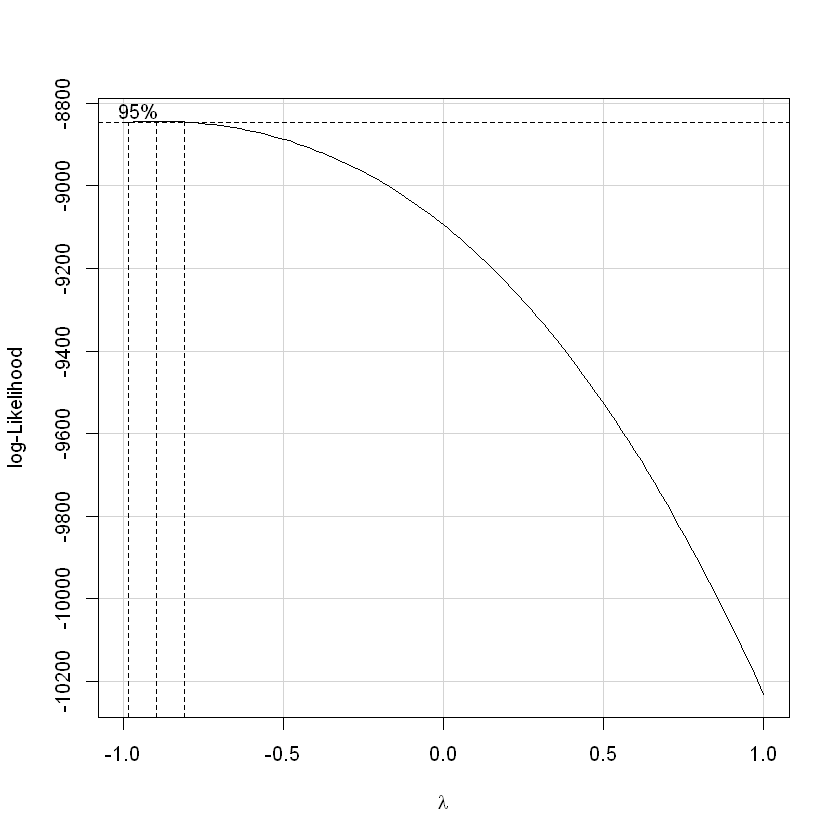

In [15]:
require(MASS, quietly=TRUE)
require(car, quietly=TRUE)

#bcPower(1:5,2)
boxCox <- boxCox(linear_reg, lambda = seq(-1, 1, by=0.1),family="yjPower")
# family: Defaults to "bcPower" for the Box-Cox power family of transformations. If set to "yjPower" the Yeo-Johnson family, 
#     which permits negative responses, is used.

#summary(powerTransform(linear_reg))

#bcPower(linear_reg)
# data$cited.by_zero[1:5]
# basicPower(data$cited.by_zero,lambda=0.05)[1:5]


# Multi-Collinearity

In [10]:
require(car,quietly=TRUE)
# Evaluate Collinearity

vif(linear_reg) # variance inflation factors 
# ??vif
sqrt(vif(linear_reg)) > 2 # problem?


,GVIF,Df,GVIF^(1/(2*Df))
abstract_length,1.121395,1.000000,1.058959
page.count,1.230075,1.000000,1.109087
title_length,1.059200,1.000000,1.029175
abstract_ratio,1.557527,1.000000,1.248009
no_references,1.352830,1.000000,1.163112
no_authors,1.099088,1.000000,1.048374
numkeys,1.200958,1.000000,1.095882
article_age,1.470111,1.000000,1.212481
weight_ratio,1.368877,1.000000,1.169990
source.title,1.547148,3.000000,1.075446


,GVIF,Df,GVIF^(1/(2*Df))
abstract_length,FALSE,FALSE,FALSE
page.count,FALSE,FALSE,FALSE
title_length,FALSE,FALSE,FALSE
abstract_ratio,FALSE,FALSE,FALSE
no_references,FALSE,FALSE,FALSE
no_authors,FALSE,FALSE,FALSE
numkeys,FALSE,FALSE,FALSE
article_age,FALSE,FALSE,FALSE
weight_ratio,FALSE,FALSE,FALSE
source.title,FALSE,FALSE,FALSE


In [24]:
confint(linear_reg)
confint(linear_reg2)

,2.5 %,97.5 %
(Intercept),-29.62181,-10.56558
abstract_length,-0.04850754,0.00531413
page.count,0.1711162,0.9559056
title_length,-0.4994959,0.1905774
abstract_ratio,25.23705,144.23139
no_references,0.05223696,0.21216736
no_authors,-1.167432,0.733121
numkeys,-0.6086713,1.7740303
article_age,2.705681,3.773041
source.titlecomputers and education,13.63812,24.34025


,2.5 %,97.5 %
(Intercept),-0.6995944,1.8189091
abstract_length,-0.0082046556,-0.0008581487
page.count,-0.0112961,0.0870356
title_length,-0.08170295,0.01303712
abstract_ratio,0.6229348,17.0929027
no_references,0.01208615,0.03218828
no_authors,-0.1400777,0.1206527
numkeys,-0.0738701,0.2560489
source.titlecomputers and education,2.681361,4.078556


In [81]:
# hist(log(data$cited.by+0.5))

In [16]:
save.image()